# MFAQUAL - MFA for Qualitatives Variables - Plot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_poison
poison = load_poison()
poison.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 1 to 55
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Age         55 non-null     int32   
 1   Time        55 non-null     int32   
 2   Sick        55 non-null     category
 3   Sex         55 non-null     category
 4   Nausea      55 non-null     category
 5   Vomiting    55 non-null     category
 6   Abdominals  55 non-null     category
 7   Fever       55 non-null     category
 8   Diarrhae    55 non-null     category
 9   Potato      55 non-null     category
 10  Fish        55 non-null     category
 11  Mayo        55 non-null     category
 12  Courgette   55 non-null     category
 13  Cheese      55 non-null     category
 14  Icecream    55 non-null     category
dtypes: category(13), int32(2)
memory usage: 3.1+ KB


In [3]:
group_name = ["desc","desc2","symptom","eat"]
group = [2,2,5,6]
group_type = ["s","n","n","n"]
num_group_sup = [0,1]

In [4]:
from scientisttools import MFAQUAL
res_mfaqual = MFAQUAL(group=group,name_group=group_name,group_type=group_type,var_weights_mfa=None,num_group_sup=[0,1],parallelize=True)
res_mfaqual.fit(poison)

MFAQUAL(group=[2, 2, 5, 6], group_type=['s', 'n', 'n', 'n'],
        name_group=['desc', 'desc2', 'symptom', 'eat'], num_group_sup=[0, 1],
        parallelize=True)

## Eigenvalues plots

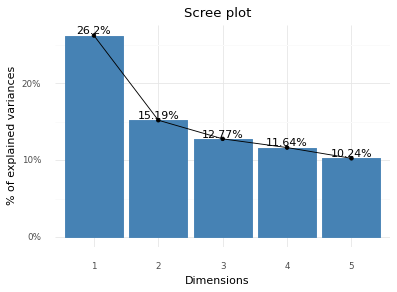

In [5]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mfaqual,add_labels=True)
print(p)

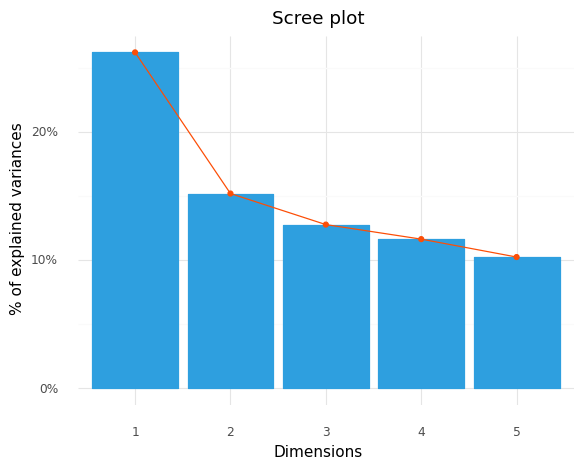

In [6]:
p = fviz_screeplot(res_mfaqual,line_color = "#FC4E07",bar_color = "#2E9FDF", bar_fill = "#2E9FDF")
print(p)

## Individuals Factor Map

### Color by RGB color

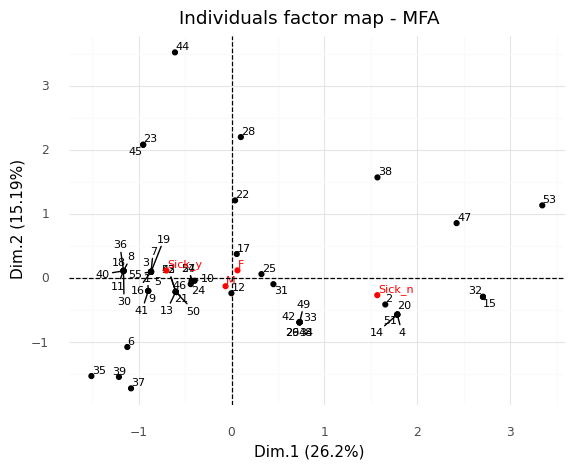

In [7]:
from scientisttools import fviz_mfa_ind
p = fviz_mfa_ind(res_mfaqual,repel=True,ind_sup=False)
print(p)

### Color by cos2

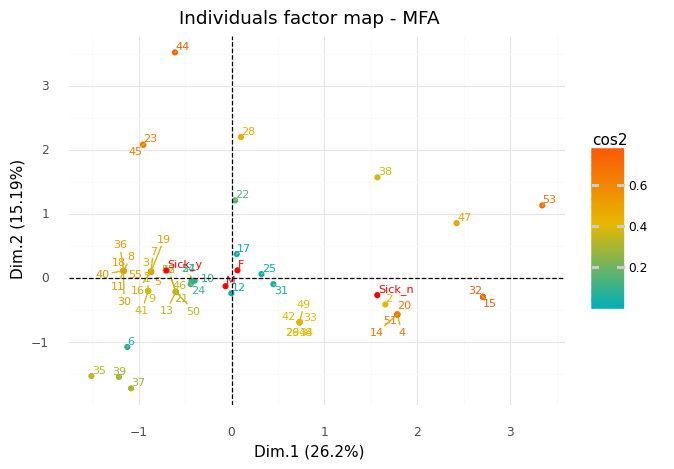

In [8]:
p = fviz_mfa_ind(res_mfaqual,color="cos2",repel=True,ind_sup=False)
print(p)

### Color by contrib

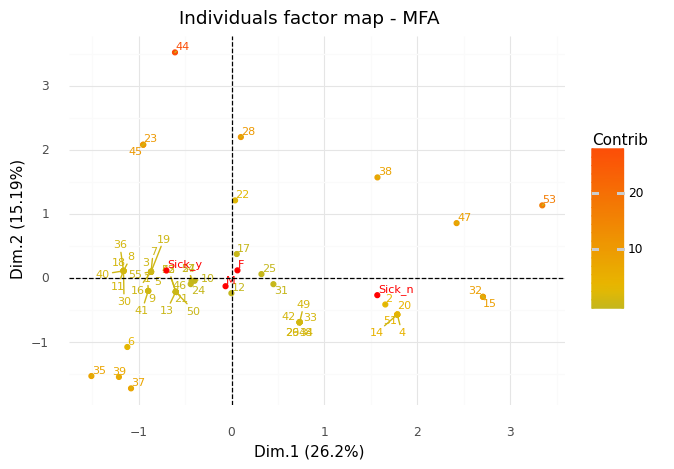

In [9]:
p = fviz_mfa_ind(res_mfaqual,color="contrib",repel=True,ind_sup=False)
print(p)

## Color by actives qualitatives variables

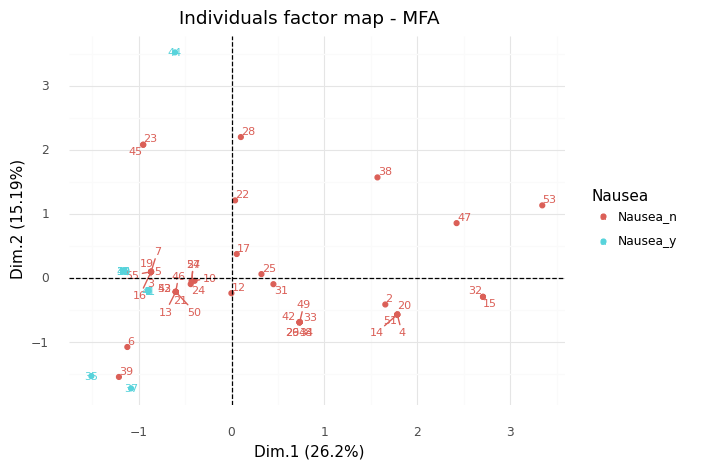

In [10]:
p = fviz_mfa_ind(res_mfaqual,habillage="Nausea",repel=True,ind_sup=False)
print(p)

### Color by supplementary qualitatives variables

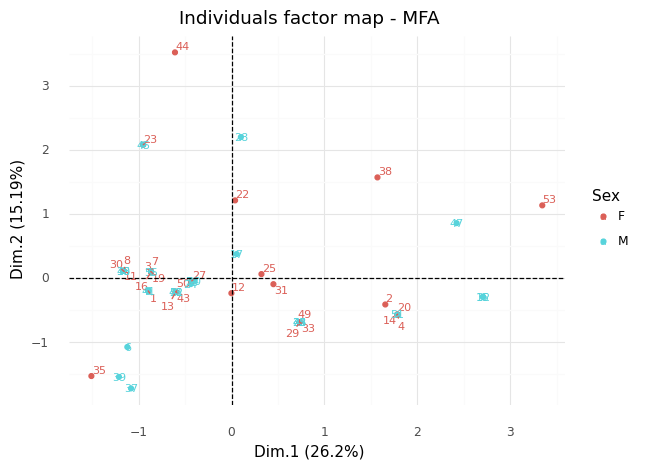

In [11]:
p = fviz_mfa_ind(res_mfaqual,habillage="Sex",repel=True,ind_sup=False)
print(p)

### Color by supplementary quantitatives variables

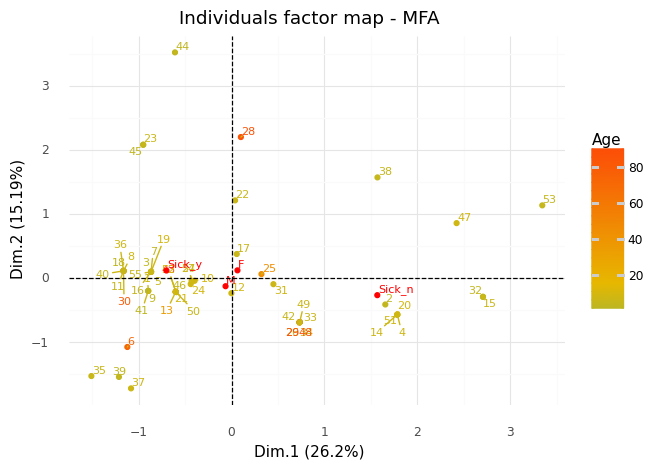

In [12]:
p = fviz_mfa_ind(res_mfaqual,color="Age",repel=True,ind_sup=False)
print(p)

### Color by numpy array

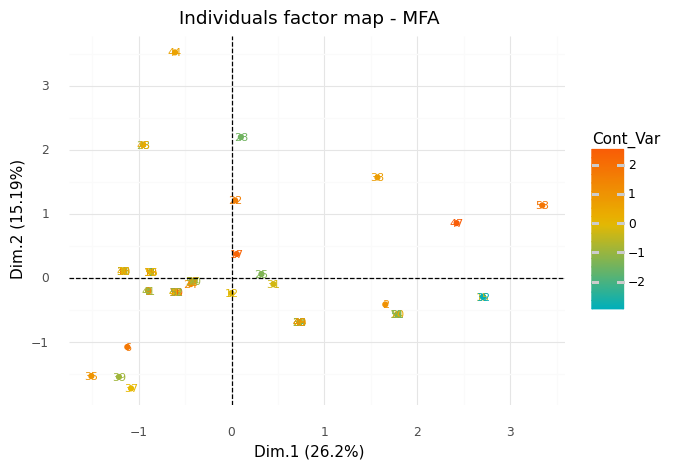

In [13]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfaqual.ind_["coord"].shape[0])
p = fviz_mfa_ind(res_mfaqual,color=color_numpy,quali_sup=False,ind_sup=False)
print(p)

### Color by kmeans

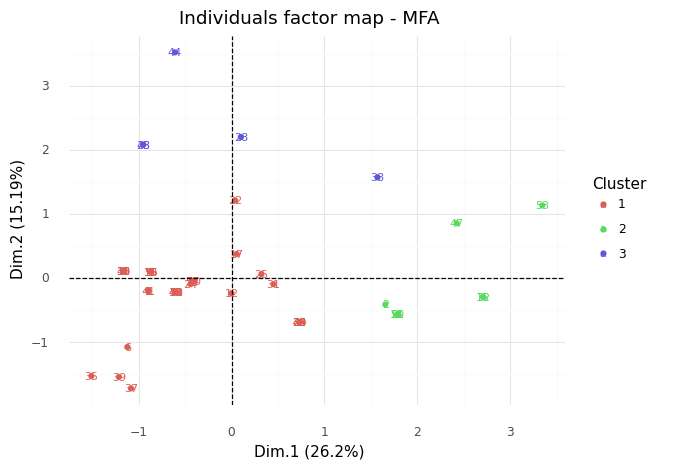

In [14]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfaqual.ind_["coord"])
p = fviz_mfa_ind(res_mfaqual,color=kmeans,repel=False,quali_sup=False,ind_sup=False)
print(p)

### Set limit

#### limit cos2

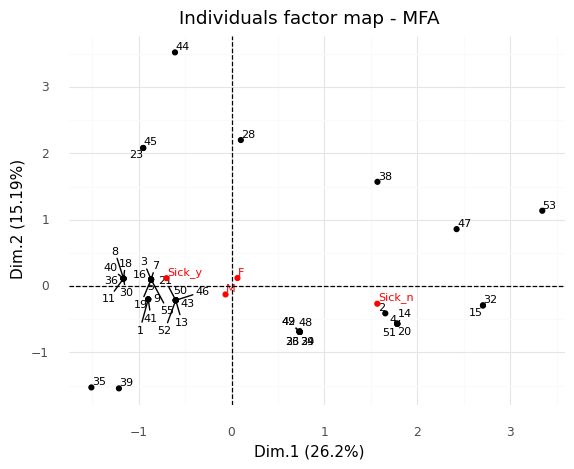

In [15]:
p = fviz_mfa_ind(res_mfaqual,lim_cos2=0.3,repel=True,ind_sup=False)
print(p)

#### limit contrib

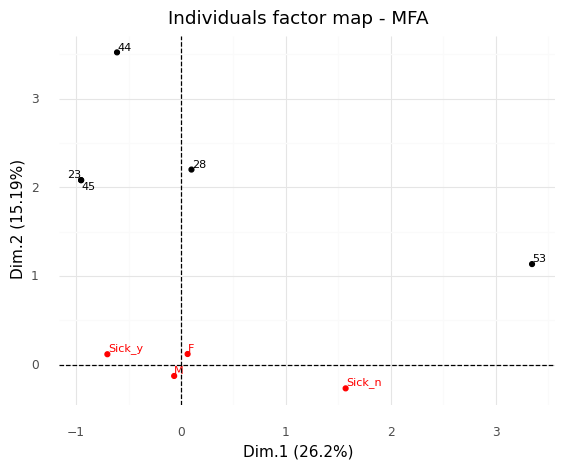

In [16]:
p = fviz_mfa_ind(res_mfaqual,lim_contrib=10,repel=True,ind_sup=False)
print(p)

## Qualitative variable categories Factor Map

### Color by RGB color

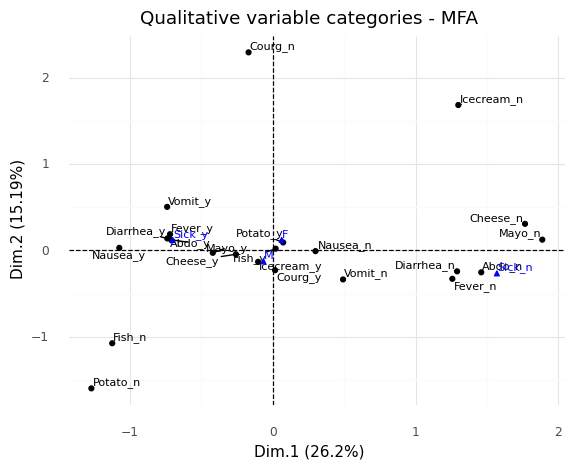

In [17]:
from scientisttools import fviz_mfa_mod
p = fviz_mfa_mod(res_mfaqual,repel=True)
print(p)    

### Color by cos2

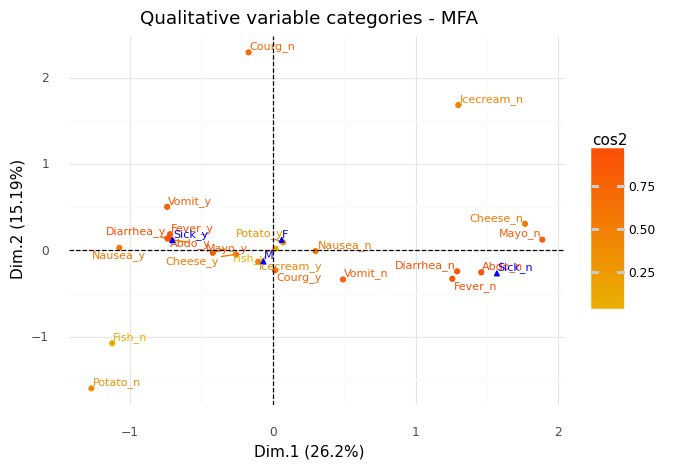

In [18]:
p = fviz_mfa_mod(res_mfaqual,color="cos2",repel=True)
print(p) 

### Color by contrib

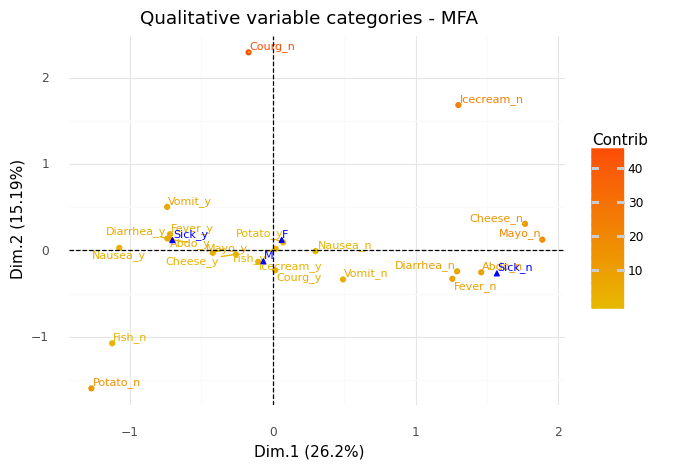

In [19]:
p = fviz_mfa_mod(res_mfaqual,color="contrib",repel=True)
print(p)

### Color by group

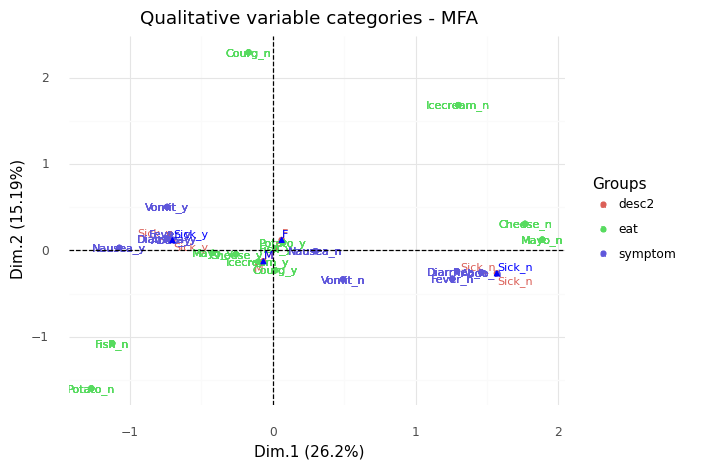

In [20]:
p = fviz_mfa_mod(res_mfaqual,color="group",repel=True)
print(p)

### Color by numpy array

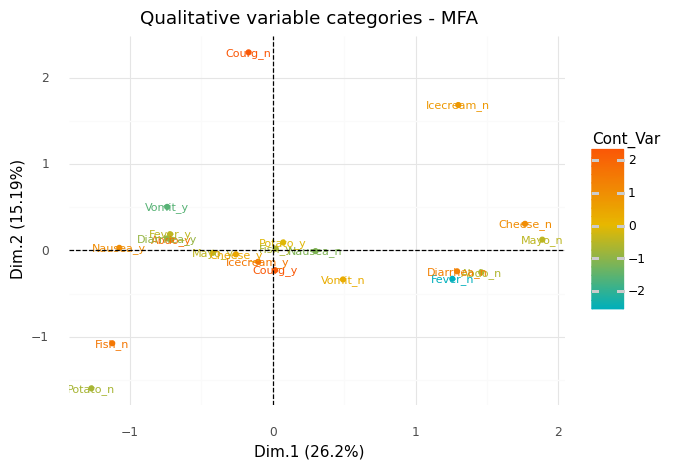

In [21]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfaqual.quali_var_["coord"].shape[0])
p = fviz_mfa_mod(res_mfaqual,color=color_numpy,quali_sup=False)
print(p)

### Color by kmeans

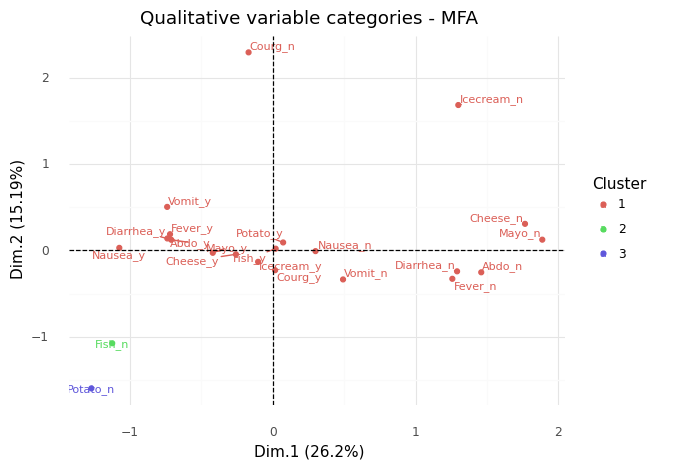

In [22]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfaqual.quali_var_["coord"])
p = fviz_mfa_mod(res_mfaqual,color=kmeans,repel=True,quali_sup=False)
print(p)

### Set limit

#### limit cos2

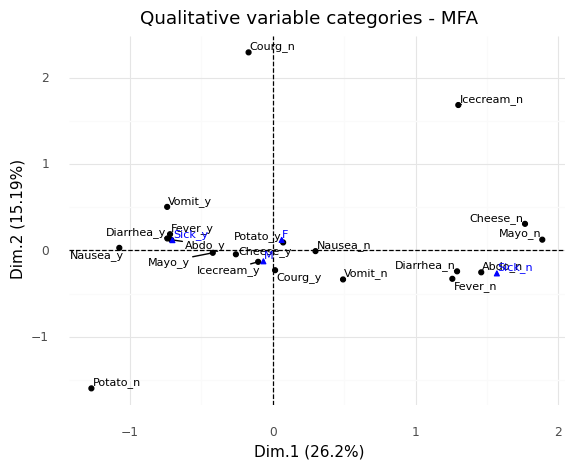

In [23]:
p = fviz_mfa_mod(res_mfaqual,lim_cos2=0.3,repel=True)
print(p)

#### limit contrib

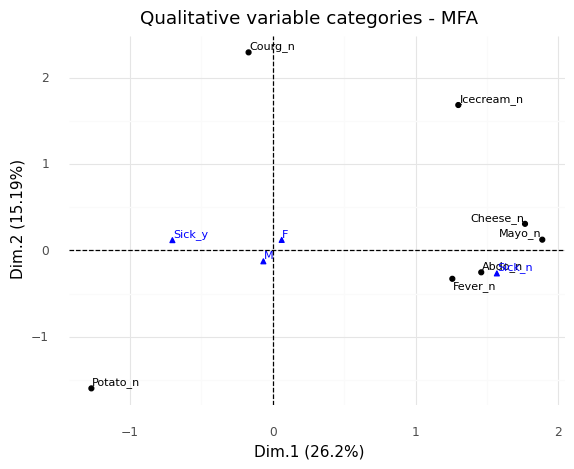

In [24]:
p = fviz_mfa_mod(res_mfaqual,lim_contrib=10,repel=True)
print(p)

## Variables groups

### Color by RGB

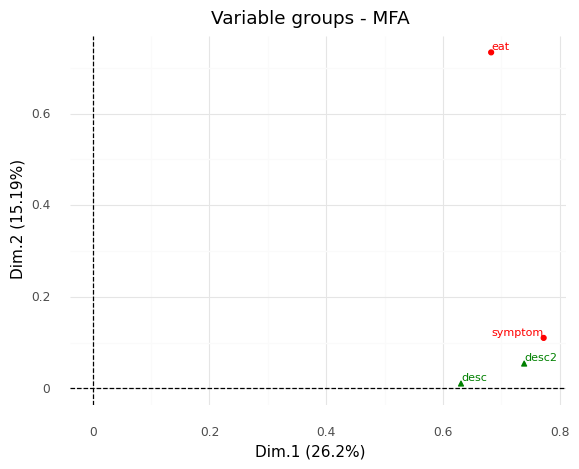

In [25]:
from scientisttools import fviz_mfa_group
p = fviz_mfa_group(res_mfaqual,repel=True)
print(p)

### Color by cos2

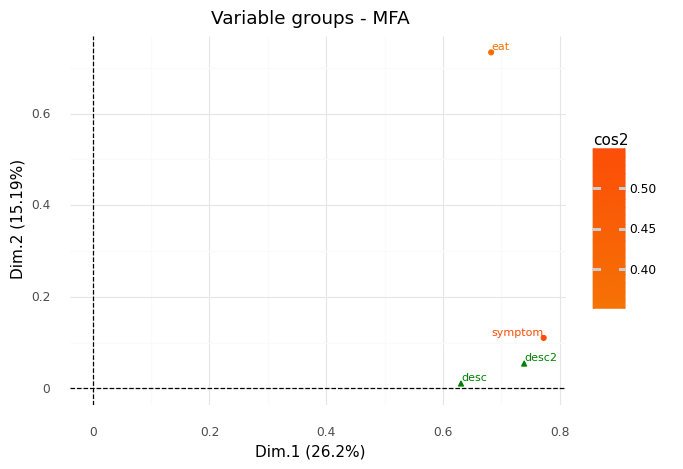

In [26]:
p = fviz_mfa_group(res_mfaqual,color="cos2",repel=True)
print(p)

### Color by contrib

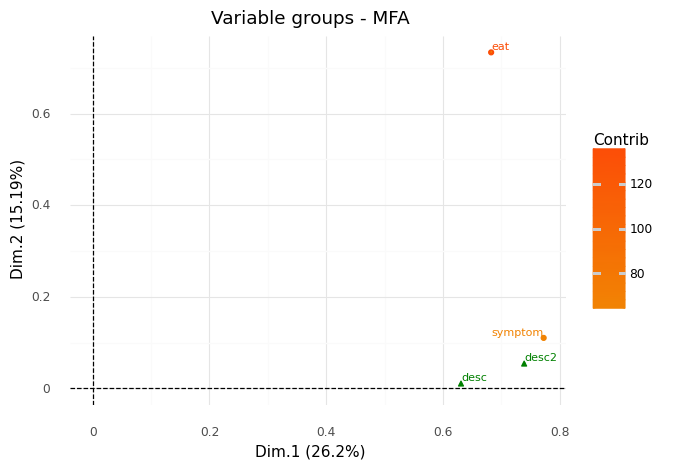

In [27]:
p = fviz_mfa_group(res_mfaqual,color="contrib",repel=True)
print(p)

### Color by numpy array

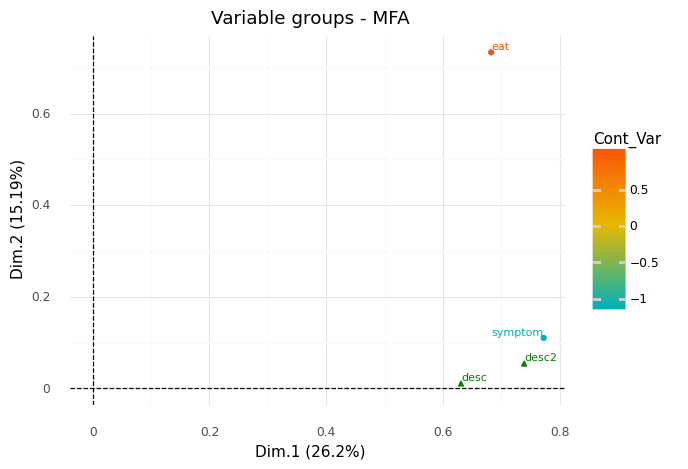

In [28]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfaqual.group_["coord"].shape[0])
p = fviz_mfa_group(res_mfaqual,color=color_numpy,repel=True)
print(p)

### Color by kmeans

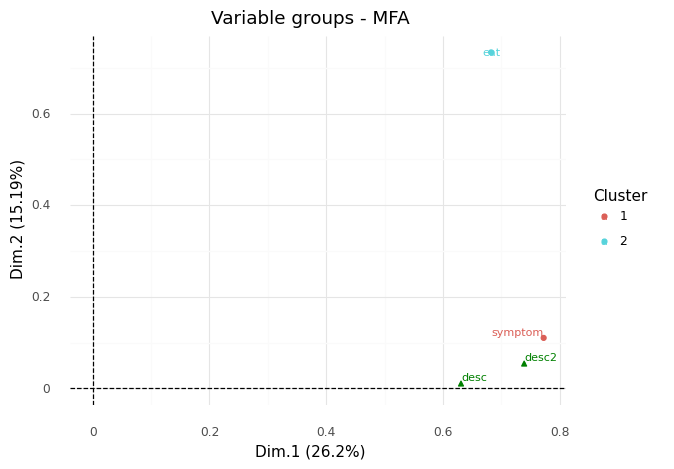

In [29]:
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_mfaqual.group_["coord"])
p = fviz_mfa_group(res_mfaqual,color=kmeans,repel=True)
print(p)

## Partial axes

### Color by RGB color

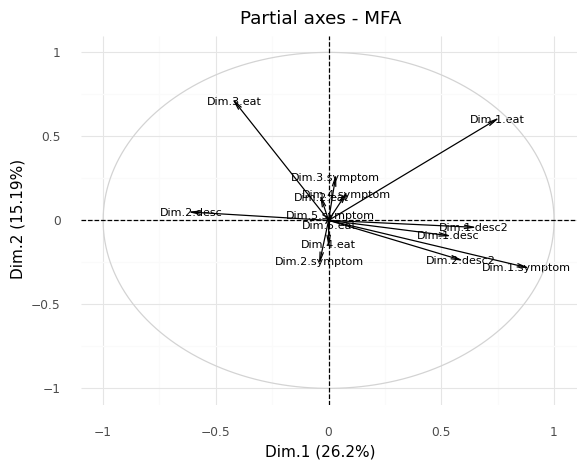

In [30]:
from scientisttools import fviz_mfa_axes
p = fviz_mfa_axes(res_mfaqual,color="black")
print(p)

### Color by group

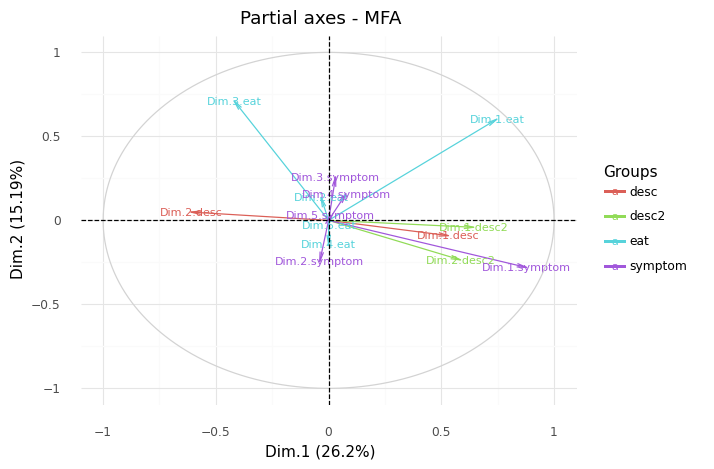

In [31]:
p = fviz_mfa_axes(res_mfaqual)
print(p)

## Plot contrib

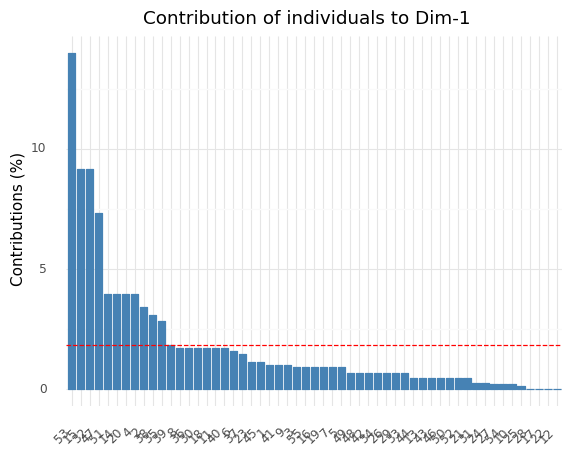

In [32]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mfaqual,choice="ind")
print(p)

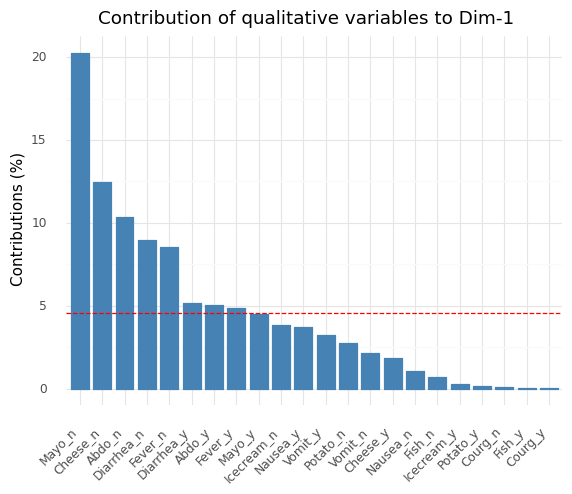

In [33]:
p = fviz_contrib(res_mfaqual,choice="quali_var")
print(p)

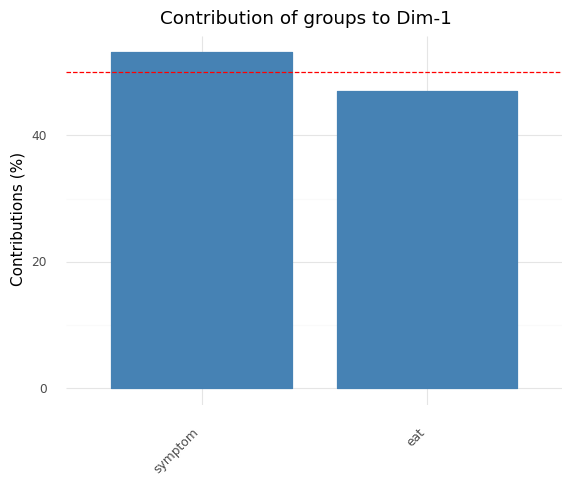

In [34]:
p = fviz_contrib(res_mfaqual,choice="group")
print(p)

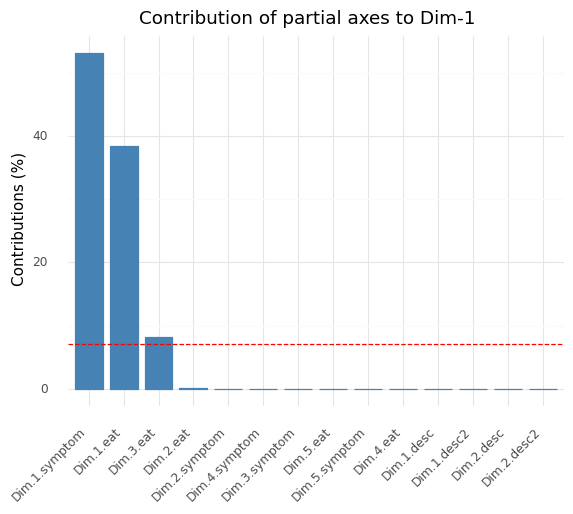

In [35]:
p = fviz_contrib(res_mfaqual,choice="partial_axes")
print(p)

## Plot cos2

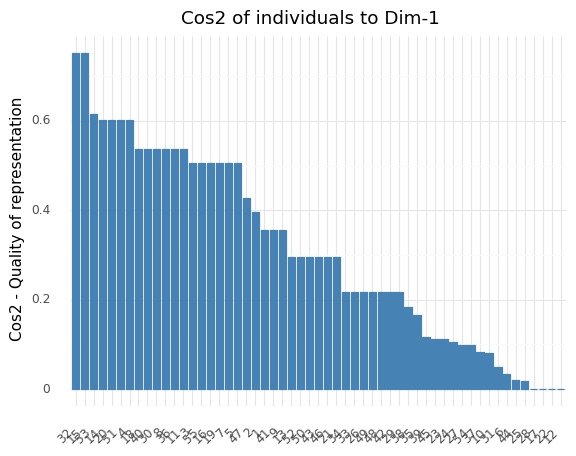

In [36]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_mfaqual)
print(p)

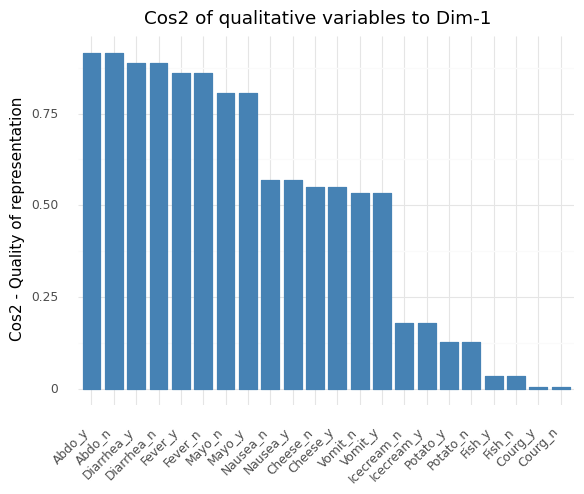

In [37]:
p = fviz_cos2(res_mfaqual,choice="quali_var")
print(p)

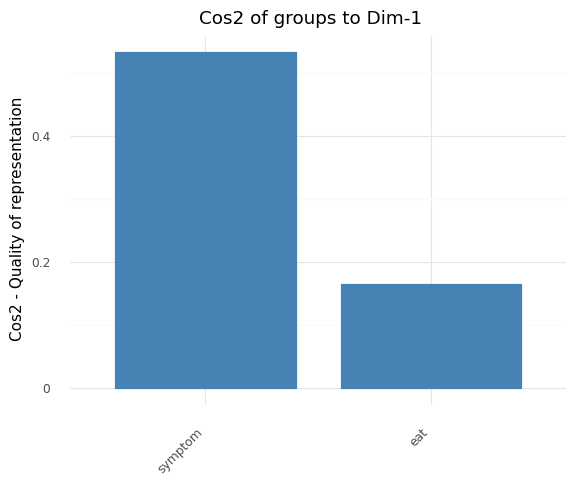

In [38]:
p = fviz_cos2(res_mfaqual,choice="group")
print(p)

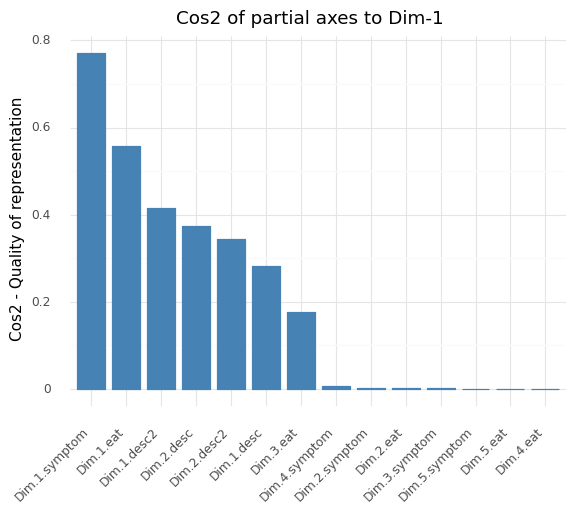

In [39]:
p = fviz_cos2(res_mfaqual,choice="partial_axes")
print(p)

### Corrcircle

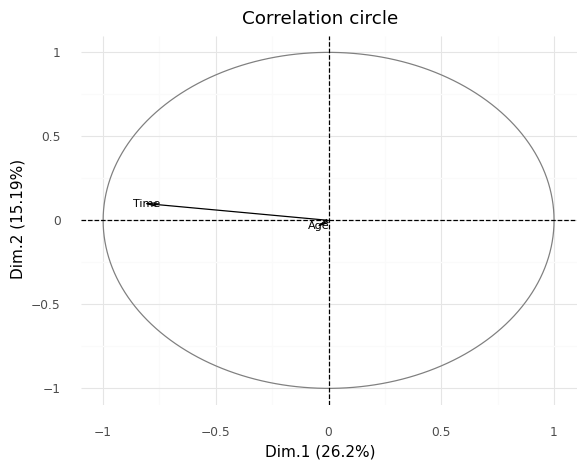

In [40]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_mfaqual)
print(p)